In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [4]:
# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [5]:
accuracy_list = []

# Find the best value for k
for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_val_pred = knn.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracy_list.append(accuracy)

In [6]:
# Get the best k
best_k = np.argmax(accuracy_list) + 1

In [7]:
# Create and train the KNN model with the best k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [8]:
# Predict on the training, validation, and testing sets
y_train_pred = knn.predict(X_train)
y_val_pred = knn.predict(X_val)
y_test_pred = knn.predict(X_test)

In [9]:
# Calculate and display the training, validation, and testing accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Best k: {best_k}')
print(f'Training Accuracy: {train_accuracy}')
print(f'Validation Accuracy: {val_accuracy}')
print(f'Testing Accuracy: {test_accuracy}')

Best k: 1
Training Accuracy: 1.0
Validation Accuracy: 1.0
Testing Accuracy: 0.9565217391304348


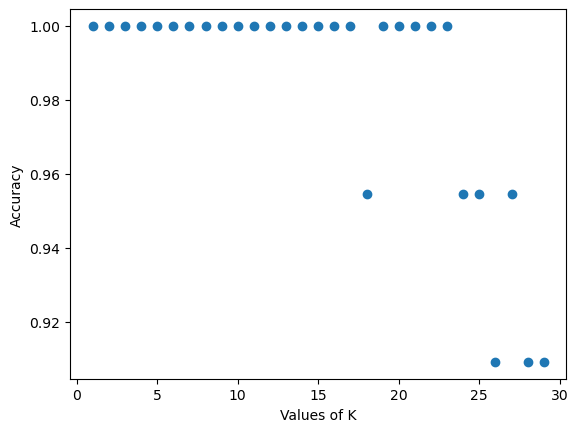

In [10]:
# plot graph of k versus scores for best k-value
k = []
k = range(1,30)
plot = plt.scatter(k, accuracy_list);
plt.ylabel("Accuracy")
plt.xlabel("Values of K")
plt.show() 

In [11]:
# Display the confusion matrix for the test set
conf_mat = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(conf_mat)

Confusion Matrix:
[[6 0 0]
 [0 9 1]
 [0 0 7]]


for `k = 1` we have best accuracy of `~100 %`